在时间序列分析中，“univariate predict univariate”指的是使用一个单一的时间序列（univariate time series）来预测该序列的未来值。这意味着你用过去的值来预测同一个时间序列的未来值。典型的例子是基于历史数据预测股票价格、温度、销量等。

以下是一个简单的例子，展示如何使用 univariate 时间序列来进行 univariate 预测。我们将使用 Python 和 pandas 进行数据处理，matplotlib 进行可视化，scikit-learn 中的线性回归模型进行预测。

示例：使用线性回归进行时间序列预测
假设我们有一组每天的温度数据，目标是使用过去的温度预测未来的温度。

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# 生成日期和温度数据
dates = pd.date_range(start="2020-01-01", periods=100, freq="D")
temperatures = np.sin(np.linspace(0, 10, 100)) * 10 + 20  # 简单的正弦波模型

# 将数据转化为 DataFrame
df = pd.DataFrame({"date": dates, "temperature": temperatures})
# 显示前几行数据
print(df.head())
df.set_index("date", inplace=True)

# 显示前几行数据
print(df.head())


        date  temperature
0 2020-01-01    20.000000
1 2020-01-02    21.008384
2 2020-01-03    22.006489
3 2020-01-04    22.984138
4 2020-01-05    23.931366
            temperature
date                   
2020-01-01    20.000000
2020-01-02    21.008384
2020-01-03    22.006489
2020-01-04    22.984138
2020-01-05    23.931366


In [21]:
len(df)

100

In [22]:
# 创建滞后特征（过去一天的温度）
df["temperature_lag_1"] = df["temperature"].shift(1)

# 删除缺失值（第一行数据没有滞后值）
df.dropna(inplace=True)

len(df), df.head()


(99,
             temperature  temperature_lag_1
 date                                      
 2020-01-02    21.008384          20.000000
 2020-01-03    22.006489          21.008384
 2020-01-04    22.984138          22.006489
 2020-01-05    23.931366          22.984138
 2020-01-06    24.838516          23.931366)

In [29]:
# 特征和目标
X = df[["temperature_lag_1"]] # 用昨天的温度预测今天
y = df["temperature"]  # 今天的温度作为目标
X.head(), y.head()

(            temperature_lag_1
 date                         
 2020-01-02          20.000000
 2020-01-03          21.008384
 2020-01-04          22.006489
 2020-01-05          22.984138
 2020-01-06          23.931366,
 date
 2020-01-02    21.008384
 2020-01-03    22.006489
 2020-01-04    22.984138
 2020-01-05    23.931366
 2020-01-06    24.838516
 Name: temperature, dtype: float64)

In [30]:
y[0:3]

date
2020-01-02    21.008384
2020-01-03    22.006489
2020-01-04    22.984138
Name: temperature, dtype: float64

In [31]:
# 拆分数据：80% 训练集，20% 测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# X 是昨天的温度 y 是今天的温度
# 查看拆分后的数据
print(X_train.head(), y_train.head())


            temperature_lag_1
date                         
2020-01-02          20.000000
2020-01-03          21.008384
2020-01-04          22.006489
2020-01-05          22.984138
2020-01-06          23.931366 date
2020-01-02    21.008384
2020-01-03    22.006489
2020-01-04    22.984138
2020-01-05    23.931366
2020-01-06    24.838516
Name: temperature, dtype: float64


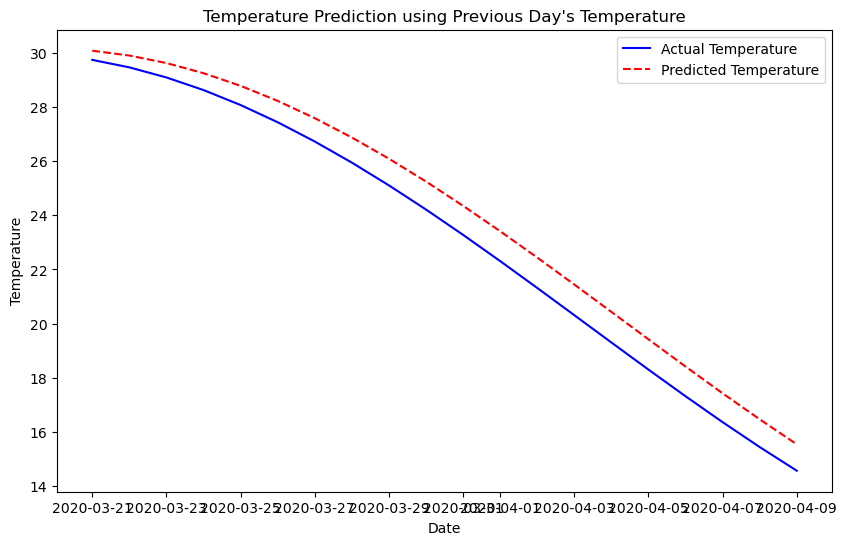

In [32]:
# 初始化并训练线性回归模型
model = LinearRegression()
model.fit(X_train, y_train)

# 用测试集进行预测
y_pred = model.predict(X_test)

# 显示预测结果
plt.figure(figsize=(10, 6))
plt.plot(df.index[-len(y_test):], y_test, label="Actual Temperature", color="blue")
plt.plot(df.index[-len(y_test):], y_pred, label="Predicted Temperature", color="red", linestyle="--")
plt.legend()
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.title("Temperature Prediction using Previous Day's Temperature")
plt.show()



在图表中，你将看到：

蓝色线条是实际的温度数据。
红色虚线是使用前一天温度（temperature_lag_1）作为特征预测的温度。
这个简单的线性回归模型展示了如何用 univariate time series（单变量时间序列）来预测另一个 univariate time series（单变量时间序列）。

在时间序列预测中，"multivariate" 和 "univariate" 主要是指使用多变量（多个特征）或单变量（一个特征）进行预测。让我们分别解释以下几种预测类型：

1. Multivariate Predict Multivariate (多变量预测多变量)
这种情况是指你使用多个特征（多个变量）来预测多个目标变量。通常，预测的目标变量和输入的特征来自同一个时间序列数据集，但这些特征和目标可能是不同的。

示例：
假设我们有一个包含以下特征的时间序列数据集：

Temperature（温度）
Humidity（湿度）
Pressure（气压）
目标是使用温度、湿度和气压来预测温度、湿度和气压未来的值。

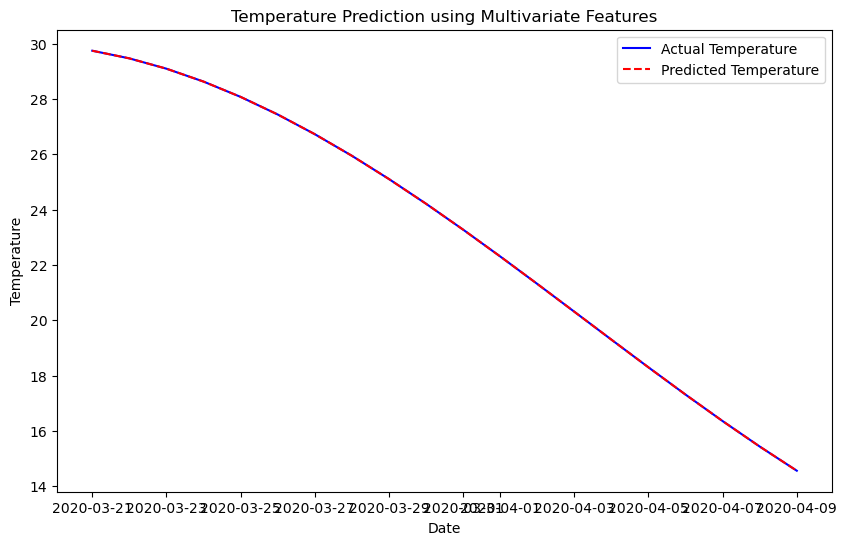

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# 生成示例数据
dates = pd.date_range(start="2020-01-01", periods=100, freq="D")
temperature = np.sin(np.linspace(0, 10, 100)) * 10 + 20
humidity = np.cos(np.linspace(0, 10, 100)) * 30 + 50
pressure = np.sin(np.linspace(0, 10, 100)) * 5 + 1000

# 构造 DataFrame
df = pd.DataFrame({
    "date": dates,
    "temperature": temperature,
    "humidity": humidity,
    "pressure": pressure
})
df.set_index("date", inplace=True)

# 创建滞后特征
df["temperature_lag_1"] = df["temperature"].shift(1)
df["humidity_lag_1"] = df["humidity"].shift(1)
df["pressure_lag_1"] = df["pressure"].shift(1)
df.dropna(inplace=True)

# 特征和目标
X = df[["temperature_lag_1", "humidity_lag_1", "pressure_lag_1"]]  # 用昨天的温度、湿度、气压预测今天
y = df[["temperature", "humidity", "pressure"]]  # 今天的温度、湿度、气压作为目标

# 拆分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# 初始化并训练模型
model = LinearRegression()
model.fit(X_train, y_train)

# 预测
y_pred = model.predict(X_test)

# 显示预测结果
plt.figure(figsize=(10, 6))
plt.plot(df.index[-len(y_test):], y_test["temperature"], label="Actual Temperature", color="blue")
plt.plot(df.index[-len(y_pred):], y_pred[:, 0], label="Predicted Temperature", color="red", linestyle="--")
plt.legend()
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.title("Temperature Prediction using Multivariate Features")
plt.show()


In [34]:
y_pred

array([[  29.74384989,   43.25340804, 1004.87192495],
       [  29.46741181,   40.34013337, 1004.7337059 ],
       [  29.09445943,   37.52533494, 1004.54722972],
       [  28.62879479,   34.83770784, 1004.3143974 ],
       [  28.07516504,   32.30465072, 1004.03758252],
       [  27.43921408,   29.95198652, 1003.71960704],
       [  26.72742504,   27.80369915, 1003.36371252],
       [  25.94705414,   25.88168904, 1002.97352707],
       [  25.10605678,   24.20554988, 1002.55302839],
       [  24.21300641,   22.79236884, 1002.1065032 ],
       [  23.27700709,   21.65655242, 1001.63850354],
       [  22.30760075,   20.80967953, 1001.15380038],
       [  21.31466989,   20.26038353, 1000.65733494],
       [  20.30833679,   20.01426413, 1000.1541684 ],
       [  19.2988604 ,   20.07383036,  999.6494302 ],
       [  18.29653168,   20.43847499,  999.14826584],
       [  17.31156874,   21.10448069,  998.65578437],
       [  16.35401266,   22.06505795,  998.17700633],
       [  15.43362512,   23.

2. Multivariate Predict Univariate (多变量预测单变量)
这种情况是指你使用多个特征（多个输入变量）来预测单一的目标变量（单一的输出变量）。这通常在你有多个特征并且想要预测一个特定的目标时使用。

示例：
假设我们有一个包含以下特征的时间序列数据集：

Temperature（温度）
Humidity（湿度）
Pressure（气压）
目标是使用温度、湿度和气压来预测温度的未来值。

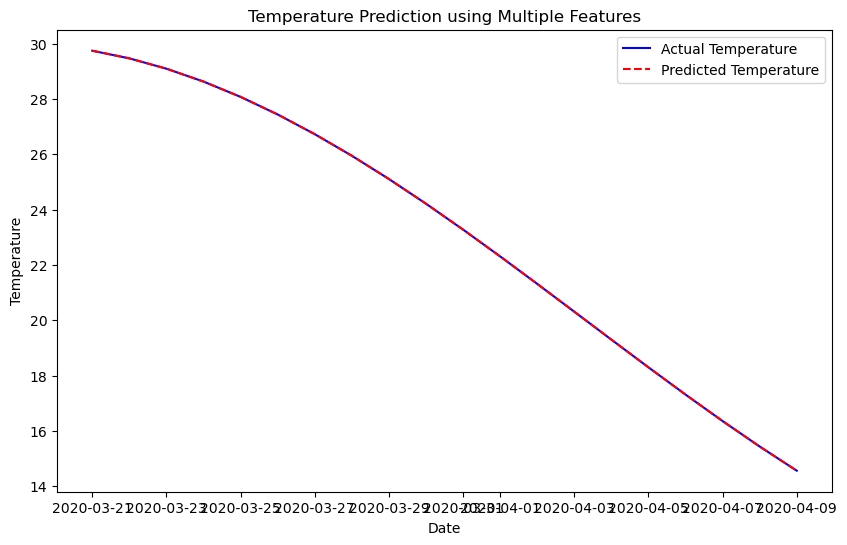

In [35]:
# 特征和目标
X = df[["temperature_lag_1", "humidity_lag_1", "pressure_lag_1"]]  # 用昨天的温度、湿度、气压预测今天的温度
y = df["temperature"]  # 今天的温度作为目标

# 拆分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# 初始化并训练模型
model = LinearRegression()
model.fit(X_train, y_train)

# 预测
y_pred = model.predict(X_test)

# 显示预测结果
plt.figure(figsize=(10, 6))
plt.plot(df.index[-len(y_test):], y_test, label="Actual Temperature", color="blue")
plt.plot(df.index[-len(y_pred):], y_pred, label="Predicted Temperature", color="red", linestyle="--")
plt.legend()
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.title("Temperature Prediction using Multiple Features")
plt.show()


In [36]:
y_pred

array([29.74384989, 29.46741181, 29.09445943, 28.62879479, 28.07516504,
       27.43921408, 26.72742504, 25.94705414, 25.10605678, 24.21300641,
       23.27700709, 22.30760075, 21.31466989, 20.30833679, 19.2988604 ,
       18.29653168, 17.31156874, 16.35401266, 15.43362512, 14.55978889])